In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
champ = pd.read_csv('../datasets/worlds/Worlds 2020 Play-In - Champion Stats - OraclesElixir.csv')

In [3]:
champ

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Top,1,2.6%,0.0%,2.6%,0%,0%,1,3,...,598,155,12,6.6,20.3%,206,21.0%,20.0%,0.36,0.16
1,Akali,Middle,1,2.6%,28.9%,31.6%,0%,0%,0,4,...,-15,108,-5,7.3,20.6%,411,27.6%,18.6%,0.4,0.03
2,Alistar,Support,11,28.9%,18.4%,47.4%,82%,100%,14,31,...,3,46,-6.4,1,2.6%,152,7.1%,9.5%,1.51,0.32
3,Aphelios,ADC,1,2.6%,0.0%,2.6%,0%,0%,0,6,...,-613,145,4,7.6,30.2%,395,20.0%,20.0%,0.27,0.17
4,Ashe,ADC,10,26.3%,21.1%,47.4%,20%,10%,19,29,...,141,193,8.5,9.1,30.1%,469,26.1%,26.1%,0.44,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Wukong,Top,8,21.1%,2.6%,28.9%,50%,50%,30,21,...,-18,-132,-10,7.5,26.0%,405,20.6%,24.7%,0.43,0.15
85,Xayah,ADC,1,2.6%,0.0%,2.6%,0%,100%,4,4,...,68,185,2,10.4,41.8%,459,33.7%,34.5%,0.45,0.33
86,Ziggs,ADC,2,5.3%,2.6%,10.5%,50%,100%,4,2,...,55,233,-2.5,8.9,29.7%,602,36.4%,27.0%,0.33,0.15
87,Ziggs,Middle,1,2.6%,2.6%,10.5%,0%,100%,1,2,...,1459,-76,-2,10.1,31.8%,592,40.3%,31.2%,0.51,0.42


In [4]:
most_played = champ[['Champion','Pos','GP']].sort_values(by='GP',ascending=False).head(10)

In [5]:
most_played

,Champion,Pos,GP
36,Leona,Support,18
22,Graves,Jungle,17
37,Lillia,Jungle,16
56,Senna,ADC,15
10,Camille,Top,13
54,Rakan,Support,13
17,Ezreal,ADC,13
26,Jhin,ADC,12
50,Ornn,Top,11
55,Renekton,Top,11


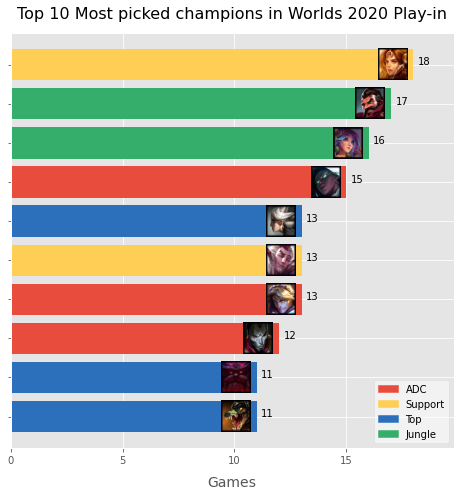

In [33]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 7))

#colors = {'ADC':'#e74c3c','Support':'#ffce54','Top':'#2c6fbb','Middle':'#9e43a2','Jungle':'#35ad6b'}
colors = {'ADC':'#e74c3c','Support':'#ffce54','Top':'#2c6fbb','Jungle':'#35ad6b'}
roles = most_played['Pos'][::-1].apply(lambda x: colors[x])
       
x = most_played['Champion'][::-1]
y = most_played['GP'].sort_values()
width = 0.8

ax.barh(x, y, width, align='center', color=roles)
ax.set_title('Top 10 Most picked champions in Worlds 2020 Play-in', fontsize=16, pad=15)
ax.set_yticklabels('')

plt.xlabel('Games', fontsize=14, labelpad=10)
plt.xticks(np.arange(0,(max(y)+3 if max(y)%2==0 else max(y)+2), 5))
plt.xlim(0, max(y) * 1.1)
plt.ylim(-0.8, len(x) - 0.2)

for i, (label, value) in enumerate(zip(x, y)):
    img = plt.imread(f'../lol-icons/{label}.png')
    plt.imshow(img, extent=[value - 1.6, value - 0.3, i - width/2, i + width / 2], aspect='auto', zorder=1)
    
for i, v in enumerate(y):
     ax.text(v + 0.2, i, str(v), color='black')

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, facecolor='white', framealpha=0.5)       
plt.tight_layout()
plt.show()

In [7]:
d_perc = lambda x: float(x[:-1])

In [8]:
champ['B%'] = champ['B%'].apply(d_perc)

In [9]:
most_banned = champ[['Champion','Pos','B%']].sort_values(by='B%',ascending=False)

In [10]:
most_banned = pd.DataFrame.drop_duplicates(most_banned, subset=['Champion'],keep='last')
most_banned = most_banned.head(10)

In [11]:
most_banned

,Champion,Pos,B%
46,Nidalee,Jungle,60.5
50,Ornn,Top,57.9
49,Orianna,Middle,57.9
38,Lucian,Middle,47.4
37,Lillia,Jungle,44.7
55,Renekton,Top,42.1
61,Shen,Top,39.5
6,Bard,Support,31.6
22,Graves,Jungle,31.6
45,Nautilus,Support,28.9


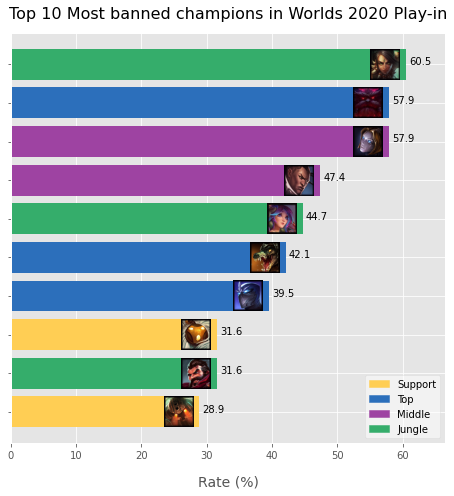

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 7))

colors = {'Support':'#ffce54','Top':'#2c6fbb','Middle':'#9e43a2','Jungle':'#35ad6b'}
x = most_banned['Champion'][::-1]
y = most_banned['B%'].sort_values()
roles = most_banned['Pos'][::-1].apply(lambda x: colors[x])

for i, v in enumerate(y):
     ax.text(v + 0.5, i, str(v), color='black')

width = 0.8
ax.barh(x, y, width, align='center',color=roles)
ax.set_title('Top 10 Most banned champions in Worlds 2020 Play-in', fontsize=16, pad=15)
plt.xlabel('Rate (%)', fontsize=14,labelpad=15)
ax.set_yticklabels('')

for i, (label, value) in enumerate(zip(x, y)):
    img = plt.imread(f'../lol-icons/{label}.png')
    plt.imshow(img, extent=[value - 5.5, value -1, i - width/2, i + width / 2], aspect='auto', zorder=1)

plt.xlim(0, max(y) * 1.1)
plt.ylim(-0.8, len(x) - 0.2)
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, facecolor='white', framealpha=0.5)    
plt.tight_layout()
plt.show()

In [13]:
champ2 = pd.read_csv('../datasets/worlds/Worlds 2020 Main Event - Champion Stats - OraclesElixir.csv')

In [14]:
champ2

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Akali,Middle,2,4.1%,14.3%,18.4%,100%,100%,12,4,...,277,368,8.5,9,24.4%,432,17.6%,22.1%,0.29,0.27
1,Alistar,Support,5,10.2%,6.1%,16.3%,0%,100%,6,25,...,-166,28,2.2,1.2,3.2%,118,6.4%,8.8%,1.75,0.42
2,Aphelios,ADC,3,6.1%,0.0%,6.1%,67%,100%,13,6,...,317,292,5,8.9,30.1%,561,28.6%,25.8%,0.43,0.24
3,Ashe,ADC,23,46.9%,26.5%,73.5%,48%,13%,66,57,...,150,16,3.4,9.3,29.6%,464,24.9%,25.7%,0.4,0.38
4,Azir,Middle,7,14.3%,4.1%,18.4%,29%,86%,15,14,...,-84,43,-3.6,9,27.7%,352,23.7%,25.0%,0.4,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Volibear,Top,13,26.5%,20.4%,57.1%,62%,85%,34,38,...,-69,-125,4.4,7.3,21.9%,435,21.9%,21.0%,0.39,0.17
79,Wukong,Top,1,2.0%,8.2%,10.2%,0%,0%,1,6,...,-378,314,1,6.9,18.8%,312,15.3%,21.7%,0.41,0.07
80,Ziggs,ADC,2,4.1%,0.0%,4.1%,0%,100%,2,7,...,-820,-463,-22,7.9,27.4%,650,32.0%,23.8%,0.37,0.19
81,Zilean,Middle,2,4.1%,0.0%,4.1%,0%,100%,1,2,...,-971,-336,-23.5,7.7,26.2%,296,20.3%,21.7%,0.45,0.23


In [15]:
most_played2 = champ2[['Champion','Pos','GP']].sort_values(by='GP',ascending=False).head(10)
most_played2

,Champion,Pos,GP
18,Graves,Jungle,36
3,Ashe,ADC,23
57,Senna,ADC,23
68,Syndra,Middle,23
36,Lillia,Jungle,19
50,Orianna,Middle,18
51,Ornn,Top,17
25,Jhin,ADC,16
55,Renekton,Top,16
48,Nidalee,Jungle,15


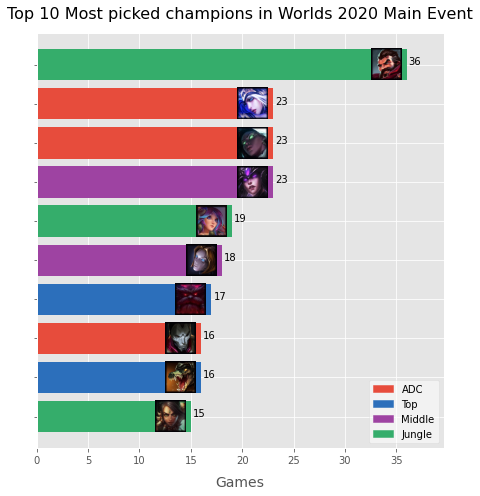

In [35]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 7))

colors = {'ADC':'#e74c3c','Top':'#2c6fbb','Middle':'#9e43a2','Jungle':'#35ad6b'}
roles = most_played2['Pos'][::-1].apply(lambda x: colors[x])
       
x = most_played2['Champion'][::-1]
y = most_played2['GP'].sort_values()
width = 0.8

ax.barh(x, y, width, align='center', color=roles)
ax.set_title('Top 10 Most picked champions in Worlds 2020 Main Event', fontsize=16, pad=15)
ax.set_yticklabels('')

plt.xlabel('Games', fontsize=14, labelpad=10)
plt.xticks(np.arange(0,(max(y)+3 if max(y)%2==0 else max(y)+2), 5))
plt.xlim(0, max(y) * 1.1)
plt.ylim(-0.8, len(x) - 0.2)

for i, (label, value) in enumerate(zip(x, y)):
    img = plt.imread(f'../lol-icons/{label}.png')
    plt.imshow(img, extent=[value - 3.5, value - 0.5, i - width/2, i + width / 2], aspect='auto', zorder=1)
    
for i, v in enumerate(y):
     ax.text(v + 0.2, i, str(v), color='black')

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, facecolor='white', framealpha=0.5)       
plt.tight_layout()
plt.show()

In [17]:
champ2['B%'] = champ2['B%'].apply(d_perc)

In [18]:
most_banned2 = champ2[['Champion','Pos','B%']].sort_values(by='B%',ascending=False)

In [19]:
most_banned2 = pd.DataFrame.drop_duplicates(most_banned2, subset=['Champion'],keep='last')
most_banned2 = most_banned2.head(10)

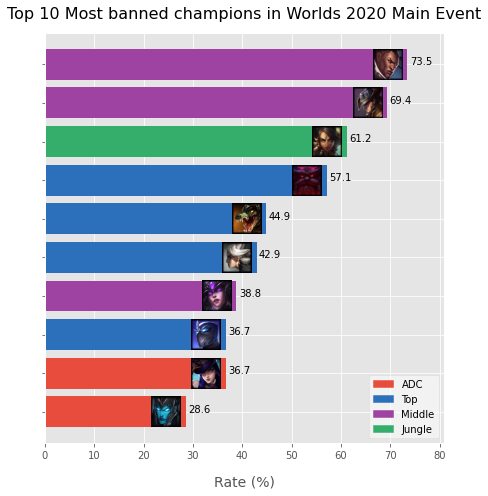

In [36]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 7))

colors = {'ADC':'#e74c3c','Top':'#2c6fbb','Middle':'#9e43a2','Jungle':'#35ad6b'}
x = most_banned2['Champion'][::-1]
y = most_banned2['B%'].sort_values()
roles = most_banned2['Pos'][::-1].apply(lambda x: colors[x])

for i, v in enumerate(y):
     ax.text(v + 0.5, i, str(v), color='black')

width = 0.8
ax.barh(x, y, width, align='center',color=roles)
ax.set_title('Top 10 Most banned champions in Worlds 2020 Main Event', fontsize=16, pad=15)
plt.xlabel('Rate (%)', fontsize=14,labelpad=15)
ax.set_yticklabels('')

for i, (label, value) in enumerate(zip(x, y)):
    img = plt.imread(f'../lol-icons/{"".join(label.split())}.png')
    plt.imshow(img, extent=[value - 7, value -1, i - width/2, i + width / 2], aspect='auto', zorder=1)

plt.xlim(0, max(y) * 1.1)
plt.ylim(-0.8, len(x) - 0.2)
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, facecolor='white', framealpha=0.5)    
plt.tight_layout()
plt.show()

In [21]:
players_me = pd.read_csv('../datasets/worlds/Worlds 2020 Main Event - Player Stats - OraclesElixir.csv')

In [22]:
players_me

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,369,Top Esports,Top,6,83%,50%,24,13,29,4.1,...,304,83,-2.2,8.4,24.8%,448,21.3%,22.9%,0.39,0.26
1,AHaHaCiK,Unicorns Of Love.CIS,Jungle,6,0%,50%,13,32,23,1.1,...,-266,-561,-9.0,5.4,18.3%,381,19.2%,20.4%,0.32,0.31
2,Angel,Suning,Middle,7,71%,71%,31,16,47,4.9,...,211,-14,4.0,8.2,21.1%,495,22.0%,21.8%,0.44,0.26
3,Bdd,Gen.G,Middle,6,83%,50%,18,11,31,4.5,...,34,-128,3.7,8.6,24.8%,391,20.2%,23.8%,0.46,0.27
4,BeryL,DAMWON Gaming,Support,6,83%,50%,6,15,54,4.0,...,6,97,0.7,1.5,4.1%,160,8.3%,9.6%,1.71,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Wunder,G2 Esports,Top,7,57%,71%,23,20,43,3.3,...,196,-71,9.4,8.3,24.9%,442,19.8%,22.6%,0.49,0.21
76,xiye,LGD Gaming,Middle,6,50%,67%,30,15,34,4.3,...,86,126,1.8,8.6,25.5%,512,27.1%,25.8%,0.40,0.23
77,Yagao,JD Gaming,Middle,6,67%,67%,17,14,43,4.3,...,-61,-154,-1.7,8.2,23.3%,434,22.7%,21.4%,0.35,0.20
78,yuyanjia,Top Esports,Support,6,83%,50%,3,13,62,5.0,...,69,179,-2.3,0.9,2.5%,127,6.4%,8.8%,1.47,0.33


In [23]:
kda_players_me = players_me[['Player','Team','Pos','KDA']].sort_values(by='KDA',ascending=False).head(10)
kda_players_me

,Player,Team,Pos,KDA
37,Karsa,Top Esports,Jungle,10.8
24,Ghost,DAMWON Gaming,ADC,10.0
32,JackeyLove,Top Esports,ADC,9.1
13,Canyon,DAMWON Gaming,Jungle,8.4
18,Deft,DRX,ADC,7.9
15,Chovy,DRX,Middle,7.7
59,Rekkles,Fnatic,ADC,7.3
45,LokeN,JD Gaming,ADC,6.8
65,ShowMaker,DAMWON Gaming,Middle,6.7
57,Pyosik,DRX,Jungle,6.3


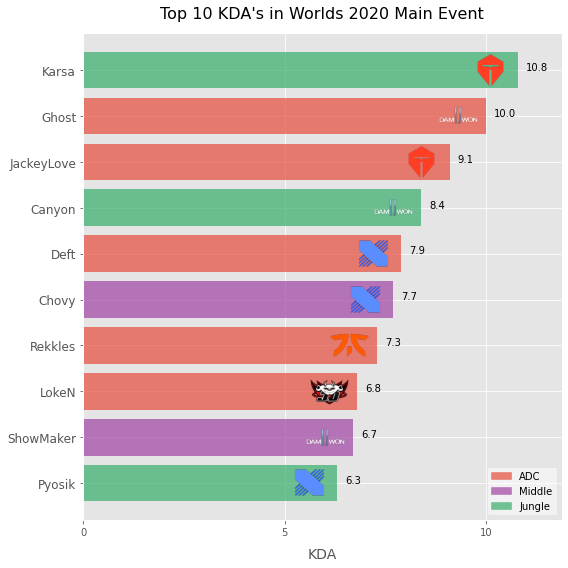

In [53]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 8))

colors = {'ADC':'#e74c3c','Middle':'#9e43a2','Jungle':'#35ad6b'}
roles = kda_players_me['Pos'][::-1].apply(lambda x: colors[x])
       
x = kda_players_me['Player'][::-1]
y = kda_players_me['KDA'].sort_values()
z = kda_players_me['Team'][::-1]
width = 0.8

ax.barh(x, y, width, align='center', color=roles, alpha=0.7)
ax.set_title("Top 10 KDA's in Worlds 2020 Main Event", fontsize=16, pad=15)
ax.set_yticklabels(x, fontsize=12)

plt.xlabel('KDA', fontsize=14, labelpad=10)
plt.xticks(np.arange(0,(max(y)+3 if max(y)%2==0 else max(y)+2), 5))
plt.xlim(0, max(y) * 1.1)
plt.ylim(-0.8, len(x) - 0.2)

for i, (label, value) in enumerate(zip(z, y)):
    img = plt.imread(f'../teams_icons/{"".join(label.split())}.png')
    plt.imshow(img, extent=[value - 1.2, value - 0.2, i - width/2, i + width / 2], aspect='auto', zorder=1)

for i, v in enumerate(y):
     ax.text(v + 0.2, i, str(v), color='black')

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.7) for label in labels]
plt.legend(handles, labels, facecolor='white', framealpha=0.5)       
plt.tight_layout()
plt.show()